# Pitchfork

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sqlite3

In [2]:
os.chdir(r'../Data')

In [3]:
conn=sqlite3.connect('./database.sqlite')

In [4]:
print(pd.read_sql_query('select * from artists',conn).head())
# print(pd.read_sql_query('select * from artists',conn).columns.values)
print(pd.read_sql_query('select * from artists',conn).columns)

   reviewid          artist
0     22703  massive attack
1     22721        krallice
2     22659    uranium club
3     22661         kleenex
4     22661         liliput
Index(['reviewid', 'artist'], dtype='object')


In [5]:
print(pd.read_sql_query('select * from content',conn).head())

   reviewid                                            content
0     22703  “Trip-hop” eventually became a ’90s punchline,...
1     22721  Eight years, five albums, and two EPs in, the ...
2     22659  Minneapolis’ Uranium Club seem to revel in bei...
3     22661  Kleenex began with a crash. It transpired one ...
4     22725  It is impossible to consider a given release b...


In [6]:
pd.read_sql_query('select * from genres',conn).head()

,reviewid,genre
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic


In [7]:
pd.read_sql_query('select * from labels',conn).head()

,reviewid,label
0,22703,virgin
1,22721,hathenter
2,22659,static shock
3,22659,fashionable idiots
4,22661,kill rock stars


In [8]:
reviews=pd.read_sql_query('select * from reviews',conn)
reviews.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017


In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18393 entries, 0 to 18392
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewid        18393 non-null  int64  
 1   title           18393 non-null  object 
 2   artist          18393 non-null  object 
 3   url             18393 non-null  object 
 4   score           18393 non-null  float64
 5   best_new_music  18393 non-null  int64  
 6   author          18393 non-null  object 
 7   author_type     14487 non-null  object 
 8   pub_date        18393 non-null  object 
 9   pub_weekday     18393 non-null  int64  
 10  pub_day         18393 non-null  int64  
 11  pub_month       18393 non-null  int64  
 12  pub_year        18393 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.8+ MB


In [10]:
reviews['best_new_music'].value_counts()

0    17450
1      943
Name: best_new_music, dtype: int64

In [11]:
pd.read_sql_query('select * from years',conn).head()

,reviewid,year
0,22703,1998.0
1,22721,2016.0
2,22659,2016.0
3,22661,2016.0
4,22725,2016.0


In [12]:
df=pd.read_sql_query("select r.reviewid,r.title,r.score,r.best_new_music,a.artist,r.author,r.author_type,r.pub_month,r.pub_year,g.genre,l.label from reviews r left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid join artists a on r.reviewid=a.reviewid",conn)
df.head()

,reviewid,title,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
0,22703,mezzanine,9.3,0,massive attack,nate patrin,contributor,1,2017,electronic,virgin
1,22721,prelapsarian,7.9,0,krallice,zoe camp,contributor,1,2017,metal,hathenter
2,22659,all of them naturals,7.3,0,uranium club,david glickman,contributor,1,2017,rock,fashionable idiots
3,22659,all of them naturals,7.3,0,uranium club,david glickman,contributor,1,2017,rock,static shock
4,22661,first songs,9.0,1,kleenex,jenn pelly,associate reviews editor,1,2017,rock,kill rock stars


In [13]:
conn.close()

In [14]:
#df=pd.read_sql_query("select r.reviewid,r.title,r.artist,r.url,r.score,r.best_new_music,r.author,r.author_type,r.pub_date,r.pub_weekday,r.pub_day,r.pub_month,r.pub_year,y.year from reviews r left join years y on r.reviewid=y.reviewid left join labels l on r.reviewid=l.reviewid left join genres g on r.reviewid=g.reviewid left join content c on r.reviewid=c.reviewid",conn)
#df.head()

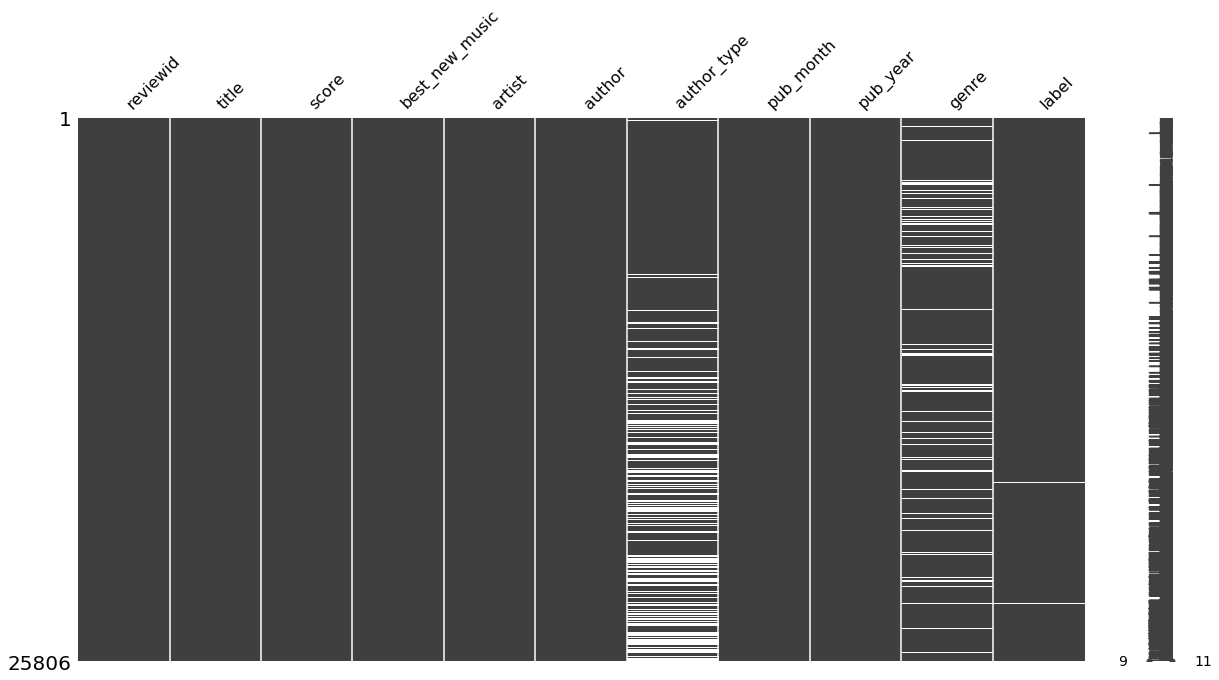

In [15]:
import missingno
missingno.matrix(df,figsize=(20,10))

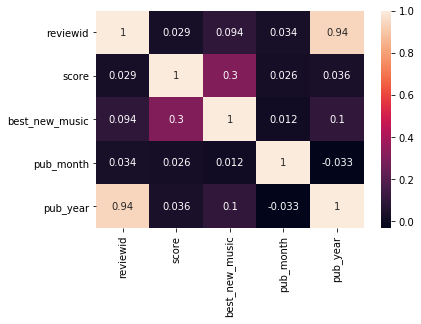

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
df.isnull().sum()

reviewid             0
title                0
score                0
best_new_music       0
artist               0
author               0
author_type       5630
pub_month            0
pub_year             0
genre             2591
label               44
dtype: int64

In [18]:
df=df.drop(['reviewid','title'],axis=1)

In [19]:
df.head()

,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
0,9.3,0,massive attack,nate patrin,contributor,1,2017,electronic,virgin
1,7.9,0,krallice,zoe camp,contributor,1,2017,metal,hathenter
2,7.3,0,uranium club,david glickman,contributor,1,2017,rock,fashionable idiots
3,7.3,0,uranium club,david glickman,contributor,1,2017,rock,static shock
4,9.0,1,kleenex,jenn pelly,associate reviews editor,1,2017,rock,kill rock stars


# Features

## Artists

In [20]:
df['artist'].value_counts()

various artists      785
xiu xiu               42
prince                40
xasthur               36
animal collective     36
                    ... 
i heart lung           1
metronome              1
oddcouple              1
smokey                 1
pieces of peace        1
Name: artist, Length: 8633, dtype: int64

## Score

In [21]:
df['score']

0        9.3
1        7.9
2        7.3
3        7.3
4        9.0
        ... 
25801    6.3
25802    7.2
25803    7.2
25804    7.2
25805    6.5
Name: score, Length: 25806, dtype: float64

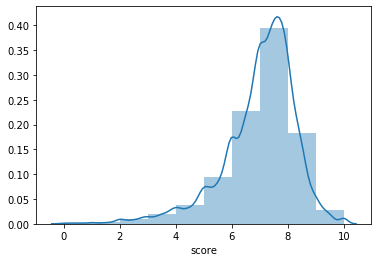

In [22]:
sns.distplot(df['score'],bins=10)

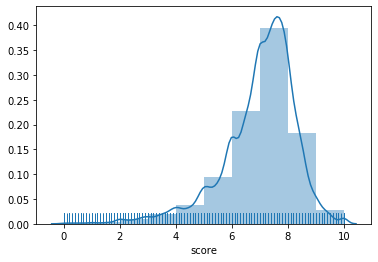

In [23]:
sns.distplot(a=df.score,bins=10,hist=True,kde=True,rug=True);


In [24]:
df['score'].value_counts(bins=10)

(7.0, 8.0]       10104
(6.0, 7.0]        6474
(8.0, 9.0]        3759
(5.0, 6.0]        2818
(4.0, 5.0]        1147
(3.0, 4.0]         568
(9.0, 10.0]        519
(2.0, 3.0]         260
(1.0, 2.0]         105
(-0.011, 1.0]       52
Name: score, dtype: int64

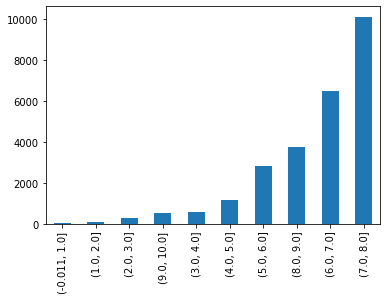

In [25]:
df['score'].value_counts(bins=10,ascending=True).plot(kind='bar',)

In [26]:
q1=df['score'].quantile(0.25)
q3=df['score'].quantile(0.75)
iqr=q3-q1
high=q3+(1.5*iqr)
low=q1-(1.5*iqr)
df.drop(df[df['score']>high].index,inplace=True)
df.drop(df[df['score']<low].index,inplace=True)

## Best New Music

In [27]:
df['best_new_music'].value_counts()

0    23185
1     1328
Name: best_new_music, dtype: int64

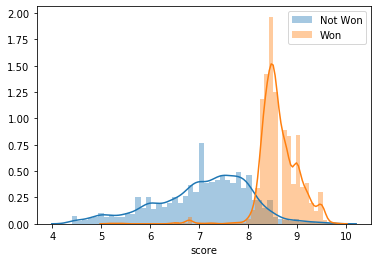

In [28]:
sns.distplot(df[df['best_new_music']==0]['score'])
sns.distplot(df[df['best_new_music']==1]['score'])
plt.legend(labels=['Not Won','Won'])
plt.show()

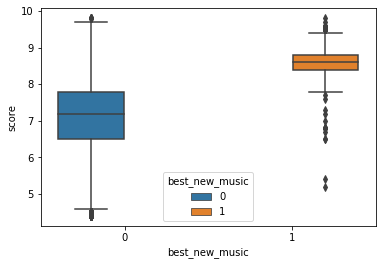

In [29]:
plt.figure()
sns.boxplot(y='score',x='best_new_music',hue='best_new_music',data=df)

In [30]:
df[(df['score']<4)&(df['best_new_music']==1)]

,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label


## Author

In [32]:
df['author'].value_counts(dropna=False)

joe tangari           1098
ian cohen              851
stephen m. deusner     821
brian howe             699
mark richardson        682
                      ... 
philip sherburne         1
simon goddard            1
judy berman              1
jared bane               1
seth colter-walls        1
Name: author, Length: 423, dtype: int64

In [33]:
df[df['score']>7]['author'].value_counts()

joe tangari                       809
mark richardson                   487
stephen m. deusner                475
brian howe                        413
marc masters                      375
                                 ... 
bruce tiffee                        1
leor galil                          1
ryan schreiber & alison fields      1
seth colter-walls                   1
max mertens                         1
Name: author, Length: 386, dtype: int64

## Author Type

In [34]:
df['author_type'].value_counts(dropna=False)

contributor                  16483
NaN                           5259
senior editor                  681
executive editor               680
senior staff writer            572
contributing editor            241
deputy news editor             131
associate staff writer         129
editor-in-chief                127
associate reviews editor        59
tracks coordinator              56
associate editor                54
assistant editor                19
associate features editor       16
news director                    3
managing editor                  3
Name: author_type, dtype: int64

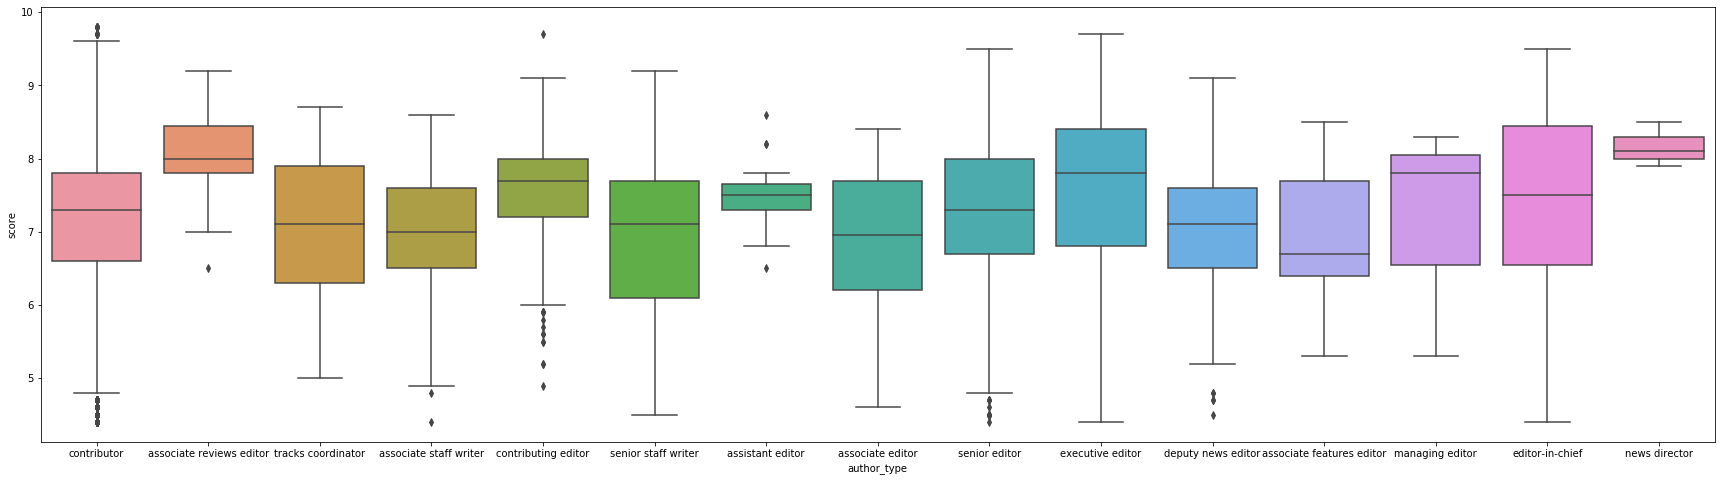

In [35]:
plt.figure(figsize=(30,8))
sns.boxplot(x='author_type',data=df,y='score')

In [36]:
df.isnull().sum()

score                0
best_new_music       0
artist               0
author               0
author_type       5259
pub_month            0
pub_year             0
genre             2490
label               44
dtype: int64

In [37]:
df['author_type']=df['author_type'].fillna(df['author_type'].mode()[0])

In [38]:
df.isnull().sum()

score                0
best_new_music       0
artist               0
author               0
author_type          0
pub_month            0
pub_year             0
genre             2490
label               44
dtype: int64

## Date
### pub_month,pub_year

In [39]:
df['pub_year'].value_counts()

2011    1727
2006    1697
2010    1654
2016    1635
2007    1627
2008    1603
2012    1577
2013    1574
2005    1553
2004    1533
2014    1522
2009    1519
2003    1389
2015    1332
2002    1170
2001     588
2000     473
1999     319
2017      21
Name: pub_year, dtype: int64

In [40]:
df[df['best_new_music']==1].groupby(by='pub_year').mean()['score']

pub_year
2003    8.680769
2004    8.691803
2005    8.698305
2006    8.668750
2007    8.658571
2008    8.596667
2009    8.599153
2010    8.658678
2011    8.652308
2012    8.670085
2013    8.588430
2014    8.652632
2015    8.598980
2016    8.486719
2017    8.920000
Name: score, dtype: float64

In [41]:
df.groupby(by=['pub_year']).mean().T

pub_year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
score,7.156113,7.280550,7.394898,7.233162,7.304968,7.369602,7.289375,7.170301,7.092440,7.090206,6.946017,7.101511,7.119861,7.065187,7.041487,7.148292,7.154505,7.249786,7.780952
best_new_music,0.000000,0.000000,0.000000,0.000000,0.056156,0.039791,0.037991,0.028285,0.043024,0.037430,0.077683,0.073156,0.075275,0.074192,0.076874,0.074901,0.073574,0.078287,0.238095
pub_month,6.357367,6.408034,8.061224,6.255556,6.268539,6.390085,6.397296,6.416028,6.214505,5.976294,6.157999,6.237001,5.985524,6.029803,6.202668,6.316032,6.317568,6.412232,1.000000


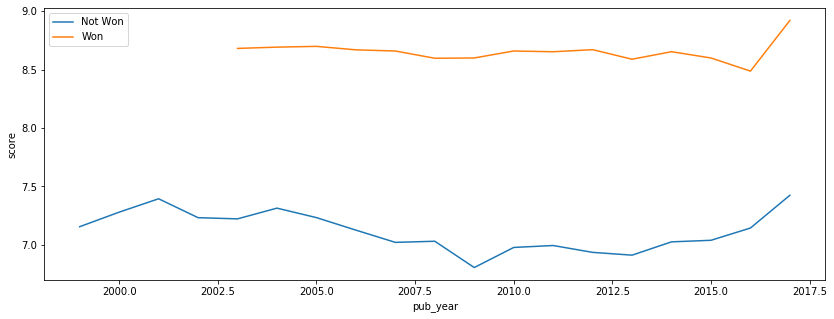

In [42]:
plt.figure(figsize=(14,5))
sns.lineplot(y=df[df['best_new_music']==0].groupby(by='pub_year').mean()['score'], x=df[df['best_new_music']==0].groupby(by='pub_year').mean().index)
sns.lineplot(y=df[df['best_new_music']==1].groupby(by='pub_year').mean()['score'], x=df[df['best_new_music']==1].groupby(by='pub_year').mean().index)
plt.legend(labels=['Not Won','Won'])
plt.show()

## Inference
    1.Best New Music awards started from 2003
    2. Removing values from 2017 since it seems that data has been taken from early 2017

In [43]:
df=df[df['pub_year']!=2017]

### pub_month

In [44]:
df['pub_month'].value_counts()

10    2381
3     2262
4     2258
6     2202
5     2180
9     2126
2     2033
11    2018
1     1983
8     1982
7     1971
12    1096
Name: pub_month, dtype: int64

## Genre

In [45]:
df['genre'].value_counts(dropna=False)

rock            9974
electronic      4125
NaN             2488
experimental    2070
rap             1825
pop/r&b         1581
metal            892
folk/country     755
jazz             509
global           273
Name: genre, dtype: int64

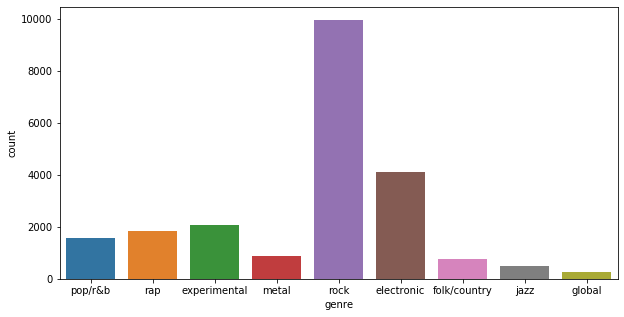

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(df['genre'])
plt.show()

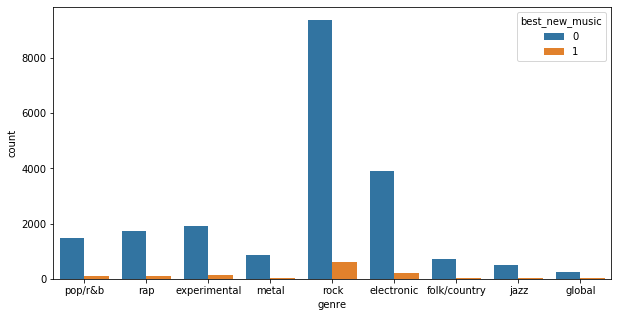

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='genre',hue='best_new_music',data=df)
plt.show()

## Labels

In [48]:
df['label'].isnull().sum()

44

In [49]:
df['label'].fillna('None',inplace=True)

C:\Users\pravi\Anaconda3\lib\site-packages\pandas\core\generic.py:6244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Base Model

In [50]:
df.head()

,score,best_new_music,artist,author,author_type,pub_month,pub_year,genre,label
23,8.1,0,chance the rapper,sheldon pearce,associate staff writer,12,2016,pop/r&b,self-released
24,8.1,0,jeremih,sheldon pearce,associate staff writer,12,2016,pop/r&b,self-released
25,8.1,0,chance the rapper,sheldon pearce,associate staff writer,12,2016,rap,self-released
26,8.1,0,jeremih,sheldon pearce,associate staff writer,12,2016,rap,self-released
27,7.2,0,jamire williams,benjamin scheim,contributor,12,2016,experimental,leaving


In [51]:
## Shape before Dropping
df.shape

(24492, 9)

In [52]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
cat_cols

['artist', 'author', 'author_type', 'genre', 'label']

In [53]:
cols=['author_type','genre']
df=pd.get_dummies(df,columns=cols,drop_first=True)

In [54]:
df['label'].isnull().sum()

0

In [55]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['artist']=le.fit_transform(df['artist'])
df['author']=le.fit_transform(df['author'])
df['label']=le.fit_transform(df['label'])
#df['pub_year']=le.fit_transform(df['pub_year'])

In [56]:
#df=df.dropna()

### MICE imputer

In [57]:
'''from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)'''

'from sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nimp = IterativeImputer(max_iter=10, random_state=0)'

In [58]:
'''df=pd.DataFrame(imp.fit_transform(df))'''

'df=pd.DataFrame(imp.fit_transform(df))'

In [59]:
## Shape after dropping
#df.shape

In [60]:
df.head()

,score,best_new_music,artist,author,pub_month,pub_year,label,author_type_associate editor,author_type_associate features editor,author_type_associate reviews editor,...,author_type_senior staff writer,author_type_tracks coordinator,genre_experimental,genre_folk/country,genre_global,genre_jazz,genre_metal,genre_pop/r&b,genre_rap,genre_rock
23,8.1,0,1209,381,12,2016,2757,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,8.1,0,3443,381,12,2016,2757,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25,8.1,0,1209,381,12,2016,2757,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26,8.1,0,3443,381,12,2016,2757,0,0,0,...,0,0,0,0,0,0,0,0,1,0
27,7.2,0,3342,42,12,2016,1786,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
df.iloc[:,[1]]

,best_new_music
23,0
24,0
25,0
26,0
27,0
...,...
25801,0
25802,0
25803,0
25804,0


In [62]:
df.isnull().sum()

score                                    0
best_new_music                           0
artist                                   0
author                                   0
pub_month                                0
pub_year                                 0
label                                    0
author_type_associate editor             0
author_type_associate features editor    0
author_type_associate reviews editor     0
author_type_associate staff writer       0
author_type_contributing editor          0
author_type_contributor                  0
author_type_deputy news editor           0
author_type_editor-in-chief              0
author_type_executive editor             0
author_type_managing editor              0
author_type_news director                0
author_type_senior editor                0
author_type_senior staff writer          0
author_type_tracks coordinator           0
genre_experimental                       0
genre_folk/country                       0
genre_globa

## Generating X and Y

In [63]:
y=df['score']
X=df.drop('score',axis=1)

## 1. Base Model

In [64]:
import statsmodels.api as sm
xc=sm.add_constant(X)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        10:21:04   Log-Likelihood:                -32991.
No. Observations:               24492   AIC:                         6.604e+04
Df Residuals:                   24463   BIC:                         6.627e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    46.3253      2.774     16.699      0.000      40.888      51.763
best_new_music                            1.5706      0.027     58.743      0.000       1.518       1.623
artist                                 4.829e-06   2.44e-06      1.980      0.048    4.76e-08    9.61e-06
author                                   -0.0001   5.15e-05     -2.729      0.006      -0.000   -3.96e-05
pub_month                                 0.0051      0.002      2.811      0.005       0.002       0.009
pub_year                                 -0.0193      0.001    -14.084      0.000      -0.022      -0.017
label                                  1.149e-05   5.76e-06      1.994      0.046    1.96e-07    2.28e-05
author_type_associate editor             -0.7292      0.249     -2.931      0.003      -1.217      -0.242
author_type_associate features editor    -0.6546      0.316     -2.071      0.038      -1.274      -0.035
author_type_associate reviews editor      0.0480      0.248      0.193      0.847      -0.438       0.534
author_type_associate staff writer       -0.4707      0.229     -2.052      0.040      -0.920      -0.021
author_type_contributing editor          -0.0311      0.222     -0.140      0.889      -0.467       0.405
author_type_contributor                  -0.5055      0.214     -2.360      0.018      -0.925      -0.086
author_type_deputy news editor           -0.5438      0.229     -2.376      0.018      -0.993      -0.095
author_type_editor-in-chief              -0.5317      0.230     -2.310      0.021      -0.983      -0.080
author_type_executive editor             -0.3336      0.217     -1.536      0.124      -0.759       0.092
author_type_managing editor              -0.7865      0.579     -1.359      0.174      -1.921       0.348
author_type_news director                 0.0104      0.579      0.018      0.986      -1.124       1.145
author_type_senior editor                -0.4892      0.217     -2.255      0.024      -0.914      -0.064
author_type_senior staff writer          -0.7303      0.218     -3.357      0.001      -1.157      -0.304
author_type_tracks coordinator           -0.5275      0.248     -2.126      0.034      -1.014      -0.041
genre_experimental                        0.2125      0.024      9.025      0.000       0.166       0.259
genre_folk/country                        0.1747      0.036      4.863      0.000       0.104       0.245
genre_global                              0.2870      0.058      4.986      0.000       0.174       0.400
genre_jazz                                0.3070      0.043      7.149      0.000       0.223       0.391
genre_metal                               0.1144      0.033      3.430      0.001       0.049       0.180
genre_pop

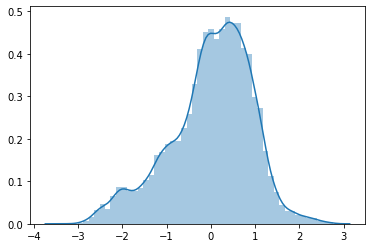

In [65]:
residuals=model.resid
sns.distplot(residuals)

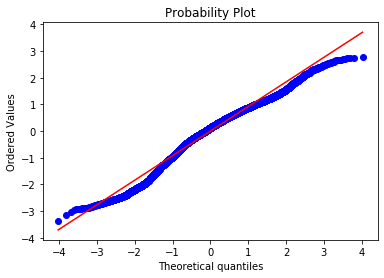

In [66]:
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

## 2. Model using Backward Elimation method

In [67]:
# Backward Elimination
cols=list(X.columns)
pmax=1
while len(cols)>0:
    p=[]
    C=X[cols]
    xc=sm.add_constant(C)
    model=sm.OLS(y,xc).fit()
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    feature_with_p_max=p.idxmax()
    if pmax>0.05:
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_cols=cols
print(selected_cols)

['best_new_music', 'artist', 'author', 'pub_month', 'pub_year', 'label', 'author_type_associate editor', 'author_type_associate features editor', 'author_type_associate staff writer', 'author_type_contributor', 'author_type_deputy news editor', 'author_type_editor-in-chief', 'author_type_executive editor', 'author_type_senior editor', 'author_type_senior staff writer', 'author_type_tracks coordinator', 'genre_experimental', 'genre_folk/country', 'genre_global', 'genre_jazz', 'genre_metal', 'genre_pop/r&b']


In [68]:
X_final=df[cols]
y=df['score']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error as mse
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3,random_state=0)

In [70]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred_train=LR.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.14306192775230542
RMSE of Train: 0.9333804123749755


In [71]:
y_pred_test=LR.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.1436629702057397
RMSE of Test: 0.9248426753788537


## 3. K-Fold

In [72]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([LR],['MVLR']):
    rmse=[]

    for train, test in kf.split(X_final,y):
        X_train,X_test=X_final.iloc[train,:],X_final.iloc[test,:]
        y_train,y_test=y.iloc[train],y.iloc[test]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        rmse.append(np.sqrt(mse(y_test,y_pred)))
print(rmse)

[0.9302133749807826, 0.923507107151289, 0.9386697032599078, 0.9379527337974741, 0.9276693692302082]


In [73]:
np.mean(rmse),np.var(rmse,ddof=1)


(0.9316024576839324, 4.3301350634185306e-05)

### 4.Lasso/Ridge/ElasticNet

## 4.1 Lasso

In [74]:
from sklearn.linear_model import Lasso,LassoCV
lasso=Lasso(alpha=0.04,normalize=True)

In [75]:
X_final=df[cols]
y=df['score']
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.3,random_state=0)

In [76]:
lasso.fit(X_train,y_train)
y_pred_train=lasso.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.0
RMSE of Train: 1.0082865258703986


In [77]:
y_pred_test=lasso.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: -0.0005452640909751061
RMSE of Test: 0.9996865972261615


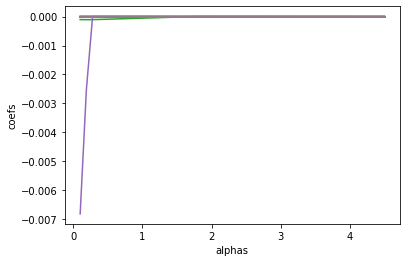

In [78]:
n_alphas = 50
alphas = np.linspace(0.1,4.5, n_alphas)
coefs=[]
lasso = Lasso()
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [79]:
n_alphas=50
alphas=np.linspace(0.1,1, n_alphas)

lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=22)
lasso_cv.fit(X,y)

LassoCV(alphas=array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734694, 0.48571429, 0.50408163, 0.52244898, 0.54081633,
       0.55918367, 0.57755102, 0.59591837, 0.61428571, 0.63265306,
       0.65102...
       0.74285714, 0.76122449, 0.77959184, 0.79795918, 0.81632653,
       0.83469388, 0.85306122, 0.87142857, 0.88979592, 0.90816327,
       0.92653061, 0.94489796, 0.96326531, 0.98163265, 1.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=22, selection='cyclic', tol=0.0001,
        verbose=False)

In [80]:
lasso_cv.alpha_

0.2653061224489796

In [81]:
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)
lasso.coef_
pd.DataFrame(lasso.coef_, X_final.columns, columns=['coefs'])

,coefs
best_new_music,0.000000
artist,0.000005
author,-0.000079
pub_month,0.000000
pub_year,-0.000000
label,0.000008
author_type_associate editor,-0.000000
author_type_associate features editor,-0.000000
author_type_associate staff writer,-0.000000
author_type_contributor,-0.000000


In [82]:
y_pred_train=lasso.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.00034904765700638496
RMSE of Train: 1.0081105404875137


In [83]:
y_pred_test=lasso.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: -0.00028736578981081173
RMSE of Test: 0.9995577504362512


### 4.2 Ridge

In [84]:
from sklearn.linear_model import Ridge,RidgeCV
ridge=Ridge(alpha=0.05)

In [85]:
ridge.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.14242252853408732
RMSE of Train: 0.9337285655505766


In [86]:
y_pred_test=ridge.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.1436679636320196
RMSE of Test: 0.924839978928571


In [87]:
ridge.fit(X, y)
ridge.coef_
pd.DataFrame(ridge.coef_, X.columns, columns=['coefs'])

,coefs
best_new_music,1.570552
artist,0.000005
author,-0.000140
pub_month,0.005063
pub_year,-0.019318
label,0.000011
author_type_associate editor,-0.712660
author_type_associate features editor,-0.636740
author_type_associate reviews editor,0.063879
author_type_associate staff writer,-0.454591


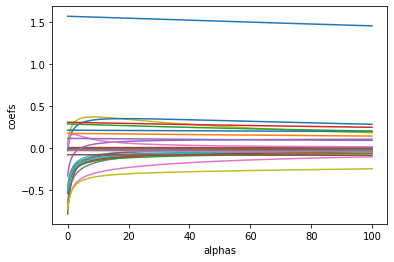

In [88]:
n_alphas = 200
alphas = np.logspace(-3, 2, n_alphas)
coefs=[]
model = Ridge()
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [89]:
n_alphas = 1000
alphas = np.logspace(-2, 0)

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X, y)

ridge_cv.alpha_

1.0

In [90]:
ridge=Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [91]:
y_pred_train=ridge.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.1430499277982309
RMSE of Train: 0.9333869475513403


In [92]:
y_pred_test=ridge.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.14374345534376887
RMSE of Test: 0.9247992124449302


### 4.3 Elastic Net/Elastic Net CV

In [93]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
enet = ElasticNet(alpha=0.1)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
y_pred_train=enet.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.04580609338184882
RMSE of Train: 0.984923008549233


In [95]:
y_pred_test=enet.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.04590130884134869
RMSE of Test: 0.9762075210386609


In [96]:
pd.DataFrame(enet.coef_, X_final.columns, columns=['coefs'])

,coefs
best_new_music,0.295780
artist,0.000005
author,-0.000087
pub_month,0.003835
pub_year,-0.010648
label,0.000009
author_type_associate editor,-0.000000
author_type_associate features editor,-0.000000
author_type_associate staff writer,-0.000000
author_type_contributor,-0.000000


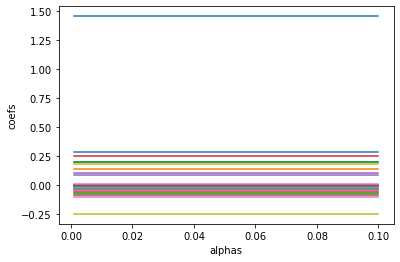

In [97]:
n_alphas = 200
alphas = np.logspace(-3, -1, n_alphas)
coefs=[]
enet = ElasticNet()
for a in alphas:
    enet.set_params(alpha=a)
    enet.fit(X_final, y)
    coefs.append(model.coef_)
    
plt.plot(alphas, coefs)
plt.xlabel('alphas')
plt.ylabel('coefs')
plt.show()

In [98]:
n_alphas = 2000
alphas = np.logspace(-3, 1, n_alphas)

en_cv = ElasticNetCV(alphas=alphas, cv=3)
en_cv.fit(X_final, y)
en_cv.alpha_

0.001

In [99]:
enet = ElasticNet(alpha=en_cv.alpha_)
enet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [100]:
y_pred_train=enet.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.14093283224983477
RMSE of Train: 0.9345392027706667


In [101]:
y_pred_test=enet.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.1427004561994879
RMSE of Test: 0.9253622862338876


### 5 Decision Tree

In [102]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [103]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [104]:
y_pred_train=dtr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.9993733733915613
RMSE of Train: 0.025239943579679968


In [105]:
y_pred_test=dtr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: -0.2759837293122258
RMSE of Test: 1.1289327383883399


### 6. Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [107]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [108]:
y_pred_train=rfr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.906328810793854
RMSE of Train: 0.3085936466378164


In [109]:
y_pred_test=rfr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.33433934428819145
RMSE of Test: 0.8154023213099066


### 7. KNN

In [110]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor(n_neighbors=5)

In [111]:
knnr.fit(X_train,y_train)
y_pred_train=knnr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.3044615852232899
RMSE of Train: 0.8409003324465546


In [112]:
y_pred_test=knnr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: -0.07787098323329955
RMSE of Test: 1.037597435265775


### 8. Bayesian Ridge

In [113]:
from sklearn.linear_model import BayesianRidge
bay=BayesianRidge()

In [114]:
bay.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [115]:
y_pred_train=bay.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.1429460834146915
RMSE of Train: 0.9334434993033702


In [116]:
y_pred_test=bay.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.14382543620458732
RMSE of Test: 0.9247549397028438


### 9. Bagging

In [117]:
from sklearn.ensemble import BaggingRegressor
baggr_lr=BaggingRegressor(base_estimator=LinearRegression())

In [118]:
baggr_lr.fit(X_train,y_train)
y_pred_train=baggr_lr.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.1429110972841673
RMSE of Train: 0.9334625513386019


In [119]:
y_pred_test=baggr_lr.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.14371762314373404
RMSE of Test: 0.9248131623634563


In [120]:
baggr_dt=BaggingRegressor(base_estimator=DecisionTreeRegressor())
baggr_dt.fit(X_train,y_train)
y_pred_train=baggr_dt.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.8693325137728933
RMSE of Train: 0.36447498915229953


In [121]:
y_pred_test=baggr_dt.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.25675211452515534
RMSE of Test: 0.8616131933175343


In [122]:
baggr_knn=BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=5))
baggr_knn.fit(X_train,y_train)
y_pred_train=baggr_knn.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.3361117803658612
RMSE of Train: 0.8215451663396102


In [123]:
y_pred_test=baggr_knn.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: -0.04193005646897108
RMSE of Test: 1.02015175816626


### 10. Boosting

In [124]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=LinearRegression())
ada.fit(X_train,y_train)
y_pred_train=ada.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.12238087219591454
RMSE of Train: 0.9445762108275803


In [125]:
y_pred_test=ada.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.11679531888022443
RMSE of Test: 0.9392391359861503


In [126]:
ada=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1))
ada.fit(X_train,y_train)
y_pred_train=ada.predict(X_train)
print('R2 score of Train:',r2_score(y_train,y_pred_train))
print('RMSE of Train:',np.sqrt(mse(y_train,y_pred_train)))

R2 score of Train: 0.11170296868024321
RMSE of Train: 0.9503051195478684


In [127]:
y_pred_test=ada.predict(X_test)
print('R2 score of Test:',r2_score(y_test,y_pred_test))
print('RMSE of Test:',np.sqrt(mse(y_test,y_pred_test)))

R2 score of Test: 0.1090614220178715
RMSE of Test: 0.9433424576811037
